In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
# Independent Features
 
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [12]:
# Dependent Feature
y = iris['target']

In [13]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [22]:
## Applying Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 2)

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

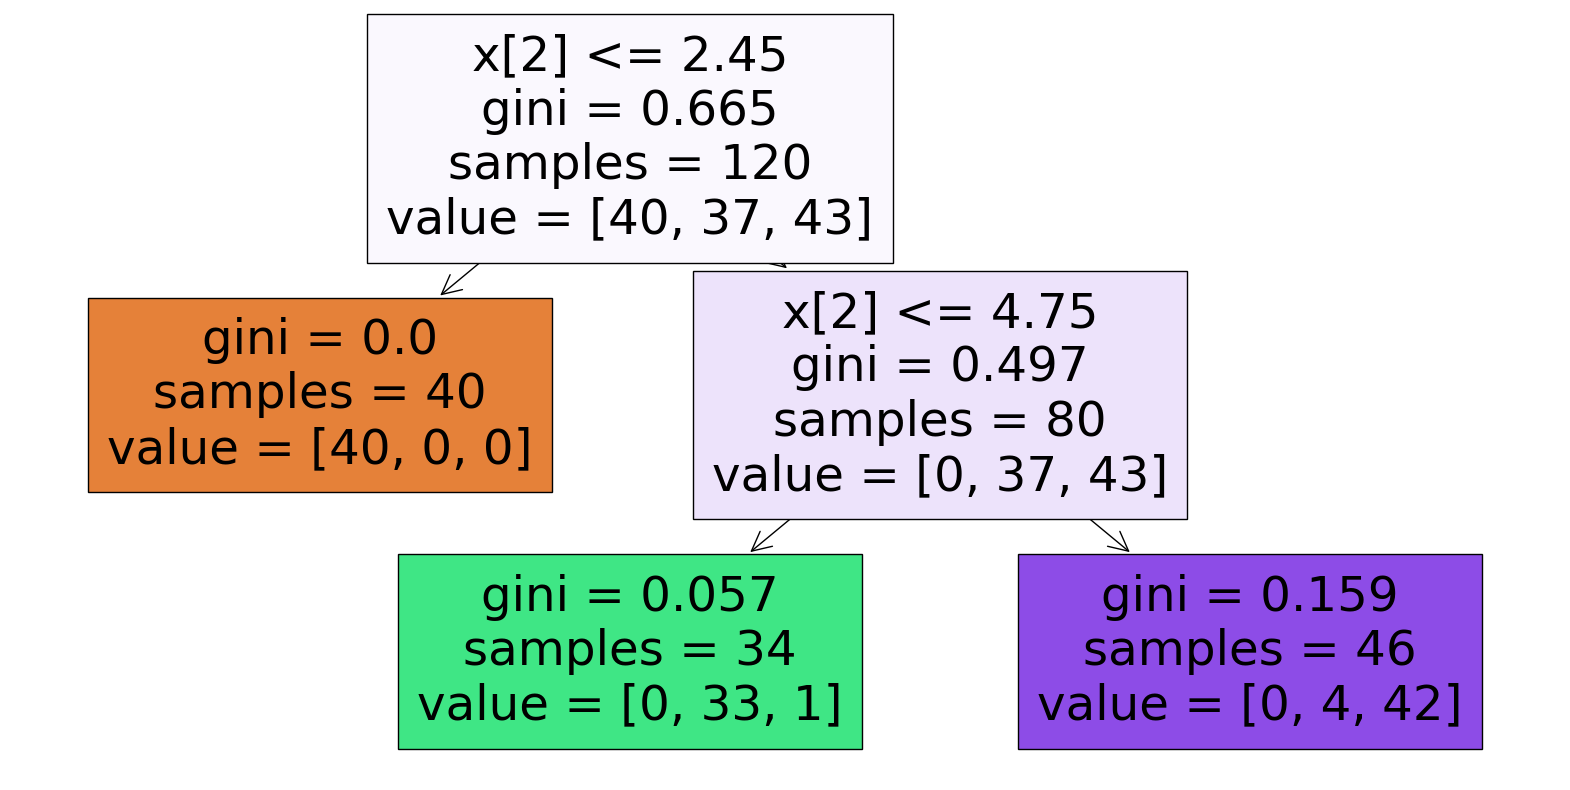

In [24]:
## Visualizing the Decision Tree

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True)
plt.show()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))



Accuracy Score:  0.9333333333333333

Confusion Matrix: 
 [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



Decision Tree Classifier Prepruning and Hyperparameter Tuning

In [28]:
param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [29]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'max_features': ['auto', 'sqrt', 'log2']}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
model = DecisionTreeClassifier()

In [32]:
grid = GridSearchCV(model, param_grid=param, cv=5, scoring='accuracy')

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [36]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [37]:
grid.best_score_

0.9666666666666666

In [38]:
y_pred = grid.predict(X_test)

In [39]:
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 2, 0, 1, 1, 1, 2])

In [40]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.8666666666666667

Confusion Matrix: 
 [[10  0  0]
 [ 0  9  4]
 [ 0  0  7]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.69      0.82        13
           2       0.64      1.00      0.78         7

    accuracy                           0.87        30
   macro avg       0.88      0.90      0.87        30
weighted avg       0.92      0.87      0.87        30

